In [ ]:
from tanric_analysis import *

settings = {
    'min_norm_samples': 20,
    'test': 'mwu',  # mwu, t_test
    'version': '6.2',  # TODO - some type of automatic versioning
    'expression_cutoff': 0.4,  # 0.3 used in TANRIC paper
    'filter_method': None,
    't_filter': 'is_expressed', # is_nonzero, is_expressed
    'multi_hyp_procedure': MultiHypProc.BEN_HOCH,
    'alpha_crit': 1e-8,
    'metric': None,
    'samples': None,
    'fold_change_fudge': 1e-4,
    'do_save': False,
    'do_plot': False,
    'analysis_date': str(datetime.datetime.now())
}

if settings['multi_hyp_procedure'] is MultiHypProc.BEN_HOCH:
    add_args = {'q': settings['alpha_crit'],
                'plot': False}
else:
    add_args = {'a': settings['alpha_crit']}

datasets = import_all_data(settings['min_norm_samples'])

TanricDataset.get_transcript_info()

TanricDataset.get_gene_info()

assess_validity(datasets, settings['expression_cutoff'])

perform_t_test(datasets,
               settings['test'],
               settings['t_filter'],
               settings['multi_hyp_procedure'],
               **add_args)

# make_multi_analysis(datasets, settings)


ModuleNotFoundError: No module named 'tanric_analysis'

In [45]:
for ds in datasets:
    qvals = ds.results['q_values']
    valid = ds.results['is_expressed']
    qvals = qvals[valid]
    num_zero = np.count_nonzero(qvals - 0 < 1e-70)  
    print('%4s - %4d - %f' % (ds.cancer_type, 
                              num_zero, 
                              -np.min(np.log10(qvals))))
    

BRCA -    0 - 55.764312
HNSC -    0 - 20.400918
KICH -    0 - 13.508873
KIRC -    0 - 49.255153
KIRP -    0 - 25.372662
LIHC -    0 - 21.239790
LUAD -    0 - 30.856977
PRAD -    0 - 20.254713
STAD -    0 - 15.888806
THCA -    0 - 28.216202


b'LINC01614' - 0
0.1302215500305578


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


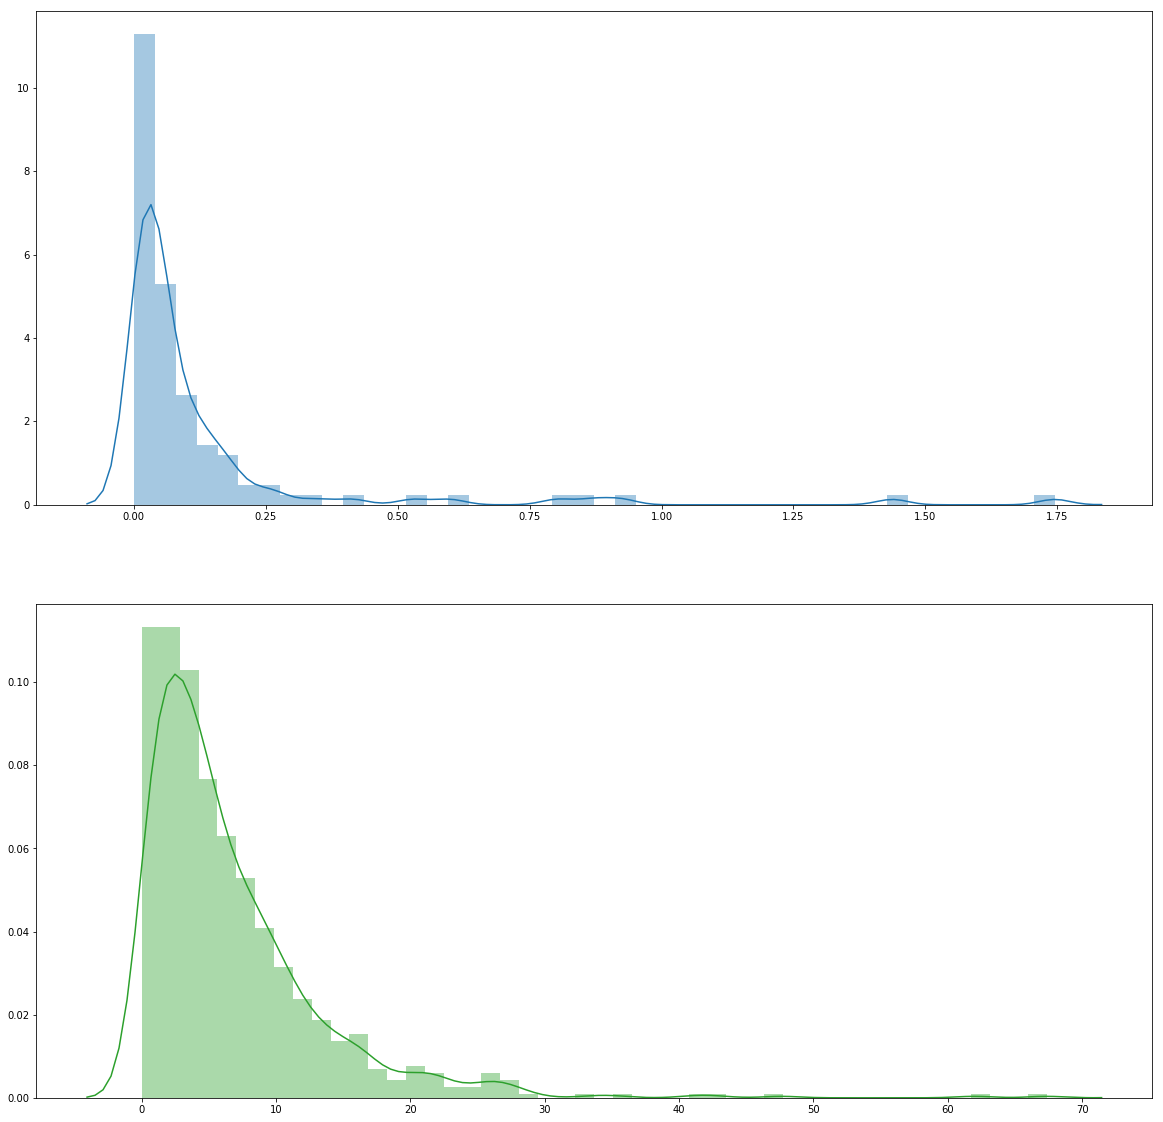

In [47]:
ds = datasets[0]
q = ds.results['q_values']
valid = ds.results['is_expressed']
x = np.zeros(ds.n_genes)
x[valid] = -np.log10(q[valid])
gene_idx = np.argmax(x)

print('%s - %d' % (TanricDataset.gene_info['code'][gene_idx], q[gene_idx]))

norm = ds.normal_samples[gene_idx, :]
print(np.mean(norm))
tum = ds.tumor_samples[gene_idx, :]

fig, ax = plt.subplots(2, 1, figsize=(20, 20), facecolor='w')
sns.distplot(norm, ax=ax[0], norm_hist=True)
sns.distplot(tum, ax=ax[1], norm_hist=True, color='C2')
plt.show()






In [41]:

make_volcano_plots(datasets, settings['fold_change_fudge'])

NameError: name 'make_volcano_plots' is not defined

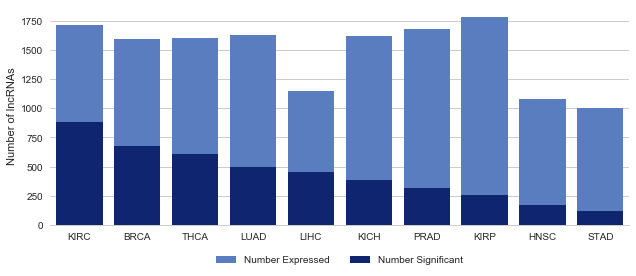

TypeError: bad operand type for abs(): 'set'

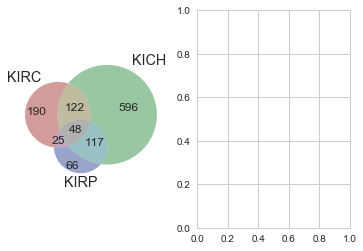

In [49]:
make_simple_charts(datasets)